In [26]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [29]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == 6).all()

In [30]:
#  3. Convert the June temperatures to a list.
june = list(june_temps)

In [31]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june, columns=['Date', 'June Temps'])
june_temps_df.set_index(june_temps_df['Date'], inplace=True)

In [32]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [33]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == 12).all()

In [34]:
# 7. Convert the December temperatures to a list.
dec = list(dec_temps)

In [35]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec, columns=['Date', 'Dec Temps'])
dec_temps_df.set_index(dec_temps_df['Date'], inplace=True)

In [36]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [37]:
# Combine both months' descriptive statistics into a summary DataFrame
june_stats = june_temps_df.describe()
dec_stats = dec_temps_df.describe()
stats_summary_df = june_stats.merge(dec_stats, left_index=True, right_index=True)
stats_summary_df

,June Temps,Dec Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


# D3 Challenge Code

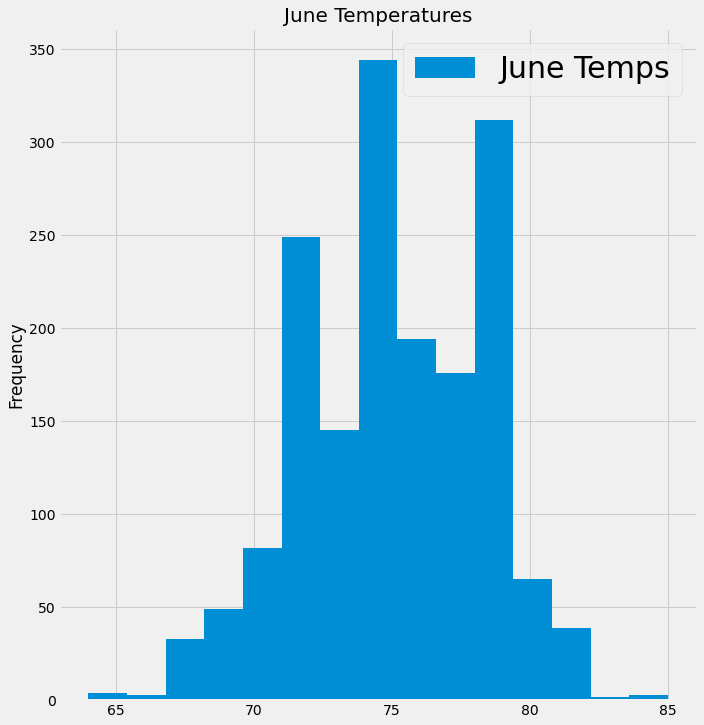

In [38]:
# Exploratory Queries
# Create a histogram to see how frequently ranges of temperatures are observed in June
june_temps_df.plot.hist(bins=15, figsize=(10,10), grid=True)
plt.tight_layout()
plt.title('June Temperatures', size=20)
plt.legend(loc='best', prop={'size': 30})
# mode of the dataset looks to be about 74-75 degrees

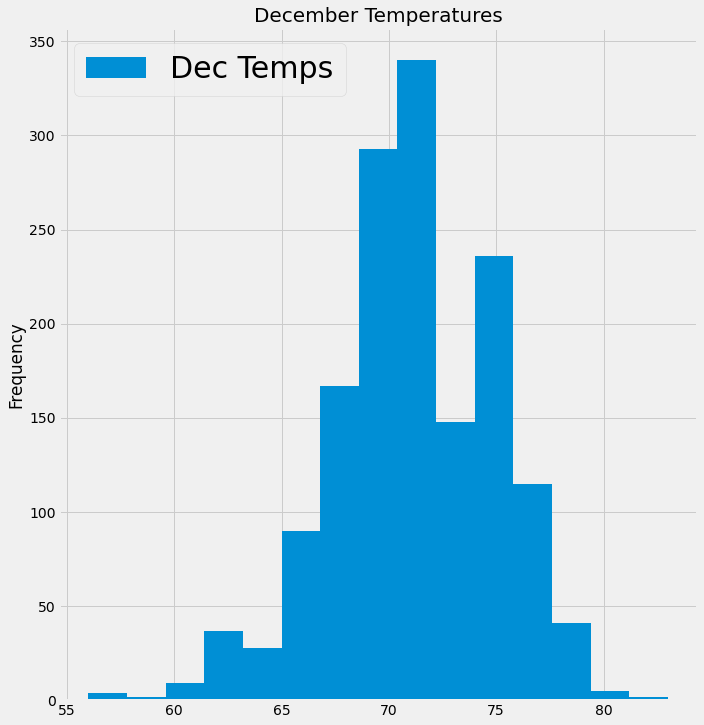

In [39]:
# Create a histogram to see how frequently ranges of temperatures are observed
dec_temps_df.plot.hist(bins=15, figsize=(10,10), grid=True)
plt.tight_layout()
plt.title('December Temperatures', size=20)
plt.legend(loc='best', prop={'size': 30})
# mode of this data set is in the neighborhood of 71-72 degrees

In [40]:
# Query the precipitation data AND temps for June
june_prcp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month', Measurement.date) == 6).all()

june = list(june_prcp)
june_prcp_df = pd.DataFrame(june, columns=['Date', 'Precipitation', 'Temps'])
print(june_prcp_df.to_string(index=False))

       Date  Precipitation  Temps
 2010-06-01           0.00   78.0
 2010-06-02           0.01   76.0
 2010-06-03           0.00   78.0
 2010-06-04           0.00   76.0
 2010-06-05           0.00   77.0
 2010-06-06           0.00   78.0
 2010-06-07           0.00   77.0
 2010-06-08           0.00   78.0
 2010-06-09           0.00   78.0
 2010-06-10           0.00   79.0
 2010-06-11           0.00   78.0
 2010-06-12           0.00   78.0
 2010-06-13           0.00   78.0
 2010-06-14           0.00   77.0
 2010-06-15           0.00   78.0
 2010-06-16           0.00   78.0
 2010-06-17           0.00   77.0
 2010-06-18           0.00   77.0
 2010-06-19           0.00   82.0
 2010-06-20           0.00   78.0
 2010-06-21           0.00   78.0
 2010-06-22           0.00   78.0
 2010-06-23           0.00   78.0
 2010-06-24           0.00   78.0
 2010-06-25           0.00   77.0
 2010-06-26           0.02   76.0
 2010-06-27           0.00   78.0
 2010-06-28           0.00   78.0
 2010-06-29   

In [44]:
june_prcp_df.describe()

,Precipitation,Temps
count,1574.000000,1574.000000
mean,0.136360,74.887548
std,0.335731,3.255695
min,0.000000,65.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


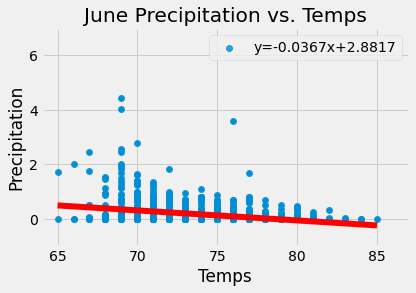

In [41]:
# Use linear regression to establish whether a relation exists between temperature and precipitation for month of June.
june_prcp_df = june_prcp_df.dropna()
june_prcp_df.plot.scatter('Temps', 'Precipitation')
plt.tight_layout()
plt.xlim([64, 87])
plt.ylim([-1, 7])
plt.title('June Precipitation vs. Temps')

slope, intercept, r_value, p_value, std_err = stats.linregress(june_prcp_df['Temps'],june_prcp_df['Precipitation'])
sns.regplot(x='Temps', y='Precipitation', data=june_prcp_df, line_kws={"color": "red"}, ci=None, label="y={0:.4f}x+{1:.4f}".format(slope,intercept)).legend(loc="best")

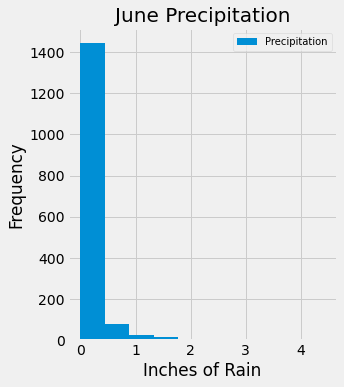

In [56]:
# Create a histogram for June Precipitation values
june_prcp_df['Precipitation'].plot.hist(bins=10, figsize=(5,5), grid=True)
plt.tight_layout()
plt.title('June Precipitation', size=20)
plt.xlabel('Inches of Rain')
plt.legend(loc='best', prop={'size': 10})

In [42]:
# Query the precipitation data AND temps for December
dec_prcp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month', Measurement.date) == 12).all()

dec = list(dec_prcp)
dec_prcp_df = pd.DataFrame(dec, columns=['Date', 'Precipitation', 'Temps'])
print(dec_prcp_df.to_string(index=False))

       Date  Precipitation  Temps
 2010-12-01           0.04   76.0
 2010-12-03           0.00   74.0
 2010-12-04           0.00   74.0
 2010-12-06           0.00   64.0
 2010-12-07           0.00   64.0
 2010-12-08           0.00   67.0
 2010-12-09           0.00   77.0
 2010-12-10           1.58   66.0
 2010-12-11           0.77   69.0
 2010-12-12           0.00   68.0
 2010-12-13           0.00   68.0
 2010-12-14           0.00   71.0
 2010-12-15           0.00   74.0
 2010-12-16           0.00   67.0
 2010-12-17           0.00   66.0
 2010-12-18           0.00   69.0
 2010-12-19           1.40   71.0
 2010-12-23           0.00   70.0
 2010-12-24           0.00   70.0
 2010-12-26            NaN   74.0
 2010-12-27           0.13   74.0
 2010-12-28           0.55   71.0
 2010-12-29           0.06   75.0
 2010-12-30           0.01   75.0
 2010-12-31           0.00   72.0
 2011-12-01           0.03   69.0
 2011-12-02           0.08   68.0
 2011-12-03           0.00   73.0
 2011-12-04   

In [45]:
dec_prcp_df.describe()

,Precipitation,Temps
count,1405.000000,1405.000000
mean,0.216819,70.930249
std,0.541399,3.741578
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,81.000000


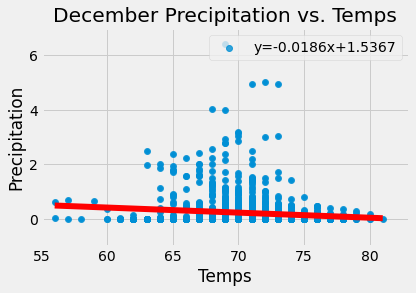

In [43]:
# Use linear regression to establish whether a relation exists between temperature and precipitation for month of December.
dec_prcp_df = dec_prcp_df.dropna()
dec_prcp_df.plot.scatter('Temps', 'Precipitation')
plt.tight_layout()
plt.xlim([55, 83])
plt.ylim([-1, 7])
plt.title('December Precipitation vs. Temps')


slope, intercept, r_value, p_value, std_err = stats.linregress(dec_prcp_df['Temps'],dec_prcp_df['Precipitation'])
sns.regplot(x='Temps', y='Precipitation', data=dec_prcp_df, line_kws={"color": "red"}, ci=None, label="y={0:.4f}x+{1:.4f}".format(slope,intercept)).legend(loc="best")

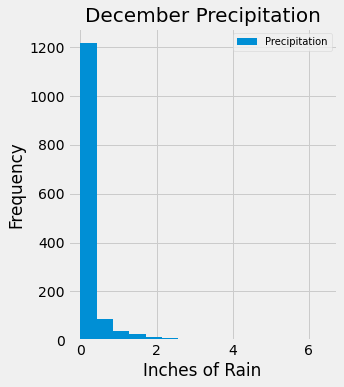

In [55]:
# Create a histogram for December Precipitation values
dec_prcp_df['Precipitation'].plot.hist(bins=15, figsize=(5,5), grid=True)
plt.tight_layout()
plt.title('December Precipitation', size=20)
plt.xlabel('Inches of Rain')
plt.legend(loc='best', prop={'size': 10})